In [22]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [23]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Letter\Letter_C_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,NaN,4.0,4.0,NaN,2.0,7.0,8.0,2.0,9.0,NaN,NaN,7.0,1.0,8.0,5.0,6.0,NaN
1,4.0,7.0,5.0,5.0,5.0,5.0,NaN,6.0,4.0,8.0,7.0,9.0,2.0,9.0,7.0,10.0,NaN
2,NaN,NaN,8.0,7.0,NaN,8.0,8.0,5.0,NaN,11.0,2.0,8.0,NaN,NaN,5.0,10.0,NaN
3,4.0,9.0,5.0,7.0,4.0,7.0,NaN,13.0,NaN,7.0,6.0,8.0,NaN,8.0,0.0,8.0,NaN
4,6.0,7.0,8.0,5.0,4.0,7.0,NaN,NaN,7.0,NaN,7.0,9.0,3.0,8.0,3.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,NaN,NaN,8.0,NaN,4.0,10.0,7.0,NaN,12.0,NaN,9.0,2.0,9.0,NaN,6.0,NaN
19996,4.0,7.0,NaN,5.0,3.0,7.0,NaN,2.0,10.0,12.0,6.0,8.0,1.0,9.0,6.0,8.0,NaN
19997,NaN,8.0,4.0,6.0,4.0,NaN,8.0,7.0,4.0,10.0,7.0,NaN,3.0,9.0,3.0,7.0,NaN
19998,4.0,11.0,4.0,8.0,3.0,0.0,NaN,4.0,6.0,1.0,0.0,7.0,NaN,8.0,0.0,NaN,NaN


In [24]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	4036
float64		column 2	3985
float64		column 3	3957
float64		column 4	3938
float64		column 5	3943
float64		column 6	4063
float64		column 7	4102
float64		column 8	4067
float64		column 9	4001
float64		column 10	3937
float64		column 11	3939
float64		column 12	4010
float64		column 13	4105
float64		column 14	3999
float64		column 15	4012
float64		column 16	3906
float64		column 17	20000


In [25]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
count,15964.000000,16015.000000,16043.000000,16062.000000,16057.000000,15937.000000,15898.000000,15933.000000,15999.000000,16063.000000,16061.000000,15990.000000,15895.000000,16001.000000,15988.000000,16094.000000,0.0
mean,4.024305,7.003372,5.115253,5.363965,3.509809,6.908452,7.505976,4.620975,5.168573,8.293656,6.471951,7.927580,3.046178,8.339666,3.692519,7.792096,NaN
std,1.912032,3.317922,2.008738,2.254333,2.199514,2.036555,2.326065,2.695996,2.386757,2.495093,2.637107,2.079779,2.335464,1.542946,2.575542,1.616388,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,1.000000,8.000000,2.000000,7.000000,NaN
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.000000,NaN
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,8.000000,NaN
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,NaN


<AxesSubplot:>

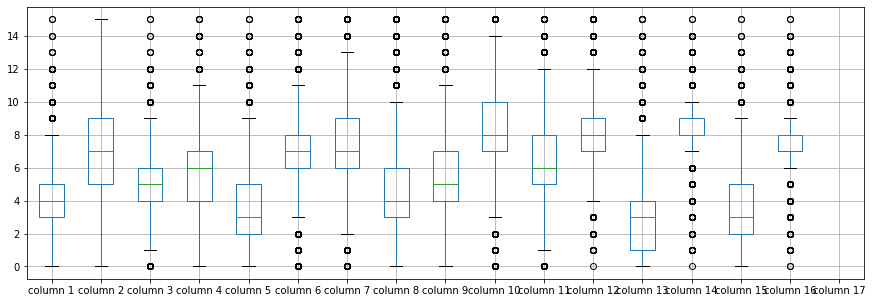

In [26]:
df.boxplot(return_type='axes', figsize=(15,5))

In [27]:
df.mean()

column 1     4.024305
column 2     7.003372
column 3     5.115253
column 4     5.363965
column 5     3.509809
column 6     6.908452
column 7     7.505976
column 8     4.620975
column 9     5.168573
column 10    8.293656
column 11    6.471951
column 12    7.927580
column 13    3.046178
column 14    8.339666
column 15    3.692519
column 16    7.792096
column 17         NaN
dtype: float64

In [28]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
column 1,1.000000,0.756917,0.852699,0.670768,0.619237,-0.026535,0.036998,0.017535,0.059373,0.147889,0.033483,-0.042189,0.490414,0.093443,0.281748,-0.103767,NaN
column 2,0.756917,1.000000,0.672461,0.824855,0.554758,0.048066,-0.044969,-0.021861,0.096453,0.160937,-0.063366,-0.002725,0.272910,-0.010601,0.231161,-0.044275,NaN
column 3,0.852699,0.672461,1.000000,0.656191,0.765543,0.066830,0.026056,-0.094805,0.058099,0.114749,0.012602,-0.042983,0.552090,0.042216,0.266829,-0.120117,NaN
column 4,0.670768,0.824855,0.656191,1.000000,0.642209,0.043002,-0.013851,0.080656,0.062007,0.020188,-0.014615,0.020411,0.259636,0.019870,0.295224,-0.026437,NaN
column 5,0.619237,0.554758,0.765543,0.642209,1.000000,0.135521,-0.025841,-0.015628,-0.065593,-0.067607,-0.074877,-0.039770,0.633686,0.012474,0.497340,-0.063375,NaN
column 6,-0.026535,0.048066,0.066830,0.043002,0.135521,1.000000,-0.363154,-0.060856,-0.118791,0.093878,-0.347203,-0.031582,0.137546,-0.254640,0.119770,0.243863,NaN
column 7,0.036998,-0.044969,0.026056,-0.013851,-0.025841,-0.363154,1.000000,-0.114490,-0.050207,0.185462,0.602743,-0.276178,-0.041177,0.555600,-0.080922,-0.207820,NaN
column 8,0.017535,-0.021861,-0.094805,0.080656,-0.015628,-0.060856,-0.114490,1.000000,-0.193405,-0.318006,0.038620,0.074264,0.146244,-0.087542,0.002164,0.179169,NaN
column 9,0.059373,0.096453,0.058099,0.062007,-0.065593,-0.118791,-0.050207,-0.193405,1.000000,0.137589,-0.064257,0.114417,-0.382961,-0.059978,0.275720,-0.059964,NaN
column 10,0.147889,0.160937,0.114749,0.020188,-0.067607,0.093878,0.185462,-0.318006,0.137589,1.000000,0.056603,-0.107157,-0.179111,0.029582,-0.081806,-0.117023,NaN


In [29]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [30]:
imputer = md.Midas(layer_structure = [17,17+12,17+12+12,17+12+12+12,17+12+12,17+12,17], vae_layer = False, seed = 120)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [17]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 60.06302106628418
Epoch: 1 , loss: 40.697232205200194
Epoch: 2 , loss: 37.240277066040036
Epoch: 3 , loss: 35.80425724182129
Epoch: 4 , loss: 35.036931773376466
Epoch: 5 , loss: 34.665123133850095
Epoch: 6 , loss: 34.318819094848635
Epoch: 7 , loss: 33.998491206359866
Epoch: 8 , loss: 33.91773430786133
Epoch: 9 , loss: 33.77991056060791
Epoch: 10 , loss: 33.716193968200685
Epoch: 11 , loss: 33.55576049804687
Epoch: 12 , loss: 33.50720170135498
Epoch: 13 , loss: 33.3988888961792
Epoch: 14 , loss: 33.31042426452637
Epoch: 15 , loss: 33.38178071136475
Epoch: 16 , loss: 33.19897504272461
Epoch: 17 , loss: 33.24484236755371
Epoch: 18 , loss: 33.11400296325684
Epoch: 19 , loss: 33.19773314666748
Epoch: 20 , loss: 33.03869560089111
Epoch: 21 , loss: 33.11715065460205
Epoch: 22 , loss: 33.04243161315918
Epoch: 23 , loss: 33.03317632446289
Epoch: 24 , loss: 33.042805317687986
Epoch: 25 , loss: 32.90345434112549

In [31]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(20000, 17)

In [32]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     3.000000
column 2     7.000000
column 3     3.000000
column 4     5.000000
column 5     1.000000
column 6     1.000000
column 7     1.000000
column 8     5.000000
column 9     5.000000
column 10    0.000000
column 11    1.000000
column 12    6.000000
column 13    0.000000
column 14    8.000000
column 15    2.984118
column 16    6.002380
column 17    0.002659
Name: 21, dtype: float64

In [33]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Letter.xlsx', header=None,names=column_names)

In [34]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.729185,0.000000,0.000000,3.320198,0.000000,0.000000,0.000000,0.000000,0.000000,-2.055531,-0.022856,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.404713,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2,-3.162572,-3.357909,0.000000,0.000000,-0.712737,0.000000,0.000000,0.000000,-5.060696,0.000000,0.000000,0.000000,0.810594,3.039976,0.000000,0.000000,NaN
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.069511,0.000000,3.791911,0.000000,0.000000,0.000000,-0.145477,0.000000,0.000000,0.000000,NaN
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.273671,1.937047,0.000000,-0.933167,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.000000,-3.222518,0.024993,0.000000,0.365011,0.000000,0.000000,0.000000,-2.966708,0.000000,-3.734782,0.000000,0.000000,0.000000,1.530594,0.000000,NaN
19996,0.000000,0.000000,-2.223238,0.000000,0.000000,0.000000,-3.220796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
19997,1.904404,0.000000,0.000000,0.000000,0.000000,2.058798,0.000000,0.000000,0.000000,0.000000,0.000000,4.432392,0.000000,0.000000,0.000000,0.000000,NaN
19998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.326928,0.000000,0.000000,0.000000,0.000000,0.000000,3.425465,0.000000,0.000000,1.865049,NaN


Calculating NRMSE Value

In [35]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [36]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [37]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

663.2564757202595

In [38]:
denominator=Frobenius_norm(complete_df)
denominator

3733.8164121981144

In [39]:
NRMS=numerator/denominator
NRMS


0.1776349992874442

In [40]:
new_df.iloc[66,:]

column 1      6.000000
column 2      9.000000
column 3     10.000000
column 4      7.000000
column 5     11.000000
column 6      4.489046
column 7      5.000000
column 8      3.000000
column 9      2.000000
column 10     9.000000
column 11     4.000000
column 12     8.000000
column 13     1.654226
column 14     6.000000
column 15     4.000000
column 16     7.000000
column 17    -0.000392
Name: 66, dtype: float64

In [41]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,4.729185,4.000000,4.000000,6.320198,2.000000,7.000000,8.000000,2.000000,9.000000,8.944469,6.977144,7.000000,1.000000,8.000000,5.000000,6.000000,-0.003870
1,4.000000,7.000000,5.000000,5.000000,5.000000,5.000000,7.595287,6.000000,4.000000,8.000000,7.000000,9.000000,2.000000,9.000000,7.000000,10.000000,-0.003118
2,3.837428,6.642091,8.000000,7.000000,3.287263,8.000000,8.000000,5.000000,4.939304,11.000000,2.000000,8.000000,2.810594,8.039976,5.000000,10.000000,0.002935
3,4.000000,9.000000,5.000000,7.000000,4.000000,7.000000,6.930489,13.000000,4.791911,7.000000,6.000000,8.000000,2.854523,8.000000,0.000000,8.000000,-0.001559
4,6.000000,7.000000,8.000000,5.000000,4.000000,7.000000,8.273671,4.937047,7.000000,9.066833,7.000000,9.000000,3.000000,8.000000,3.000000,7.000000,-0.003590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.000000,6.777482,5.024993,8.000000,3.365011,4.000000,10.000000,7.000000,5.033292,12.000000,6.265218,9.000000,2.000000,9.000000,3.530594,6.000000,-0.005950
19996,4.000000,7.000000,3.776762,5.000000,3.000000,7.000000,4.779204,2.000000,10.000000,12.000000,6.000000,8.000000,1.000000,9.000000,6.000000,8.000000,-0.003677
19997,5.904404,8.000000,4.000000,6.000000,4.000000,9.058798,8.000000,7.000000,4.000000,10.000000,7.000000,10.432392,3.000000,9.000000,3.000000,7.000000,-0.002528
19998,4.000000,11.000000,4.000000,8.000000,3.000000,0.000000,9.326928,4.000000,6.000000,1.000000,0.000000,7.000000,3.425465,8.000000,0.000000,9.865049,0.001750


In [42]:
imputations[-1].to_excel("Letter_C_5(imp).xlsx", index=False, header=False)